**Name:** Ayush Gupta  
**SAP ID:** 500125537  
**Roll No:** R2142231692  
**Program:** B.Tech CSE (AIML)

**PART A: Histogram Processing Techniques**

(3333, 4440)


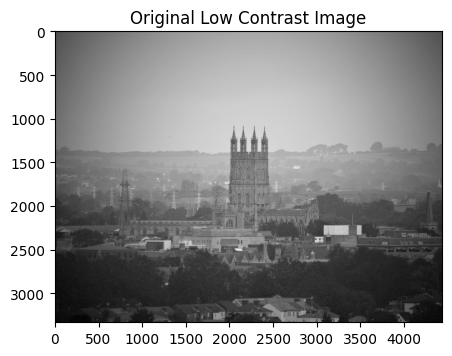

In [ ]:
#importing conputer vision (cv) library and matplotlib:
import cv2
import matplotlib.pyplot as plt

# reading grayscale image (conc.jpg)
image = cv2.imread("conc.jpg", 0)

print(image.shape) 

plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.title("Original Low Contrast Image")
plt.show()


**Plotting Histogram Of Original Image**

<function matplotlib.pyplot.show(close=None, block=None)>

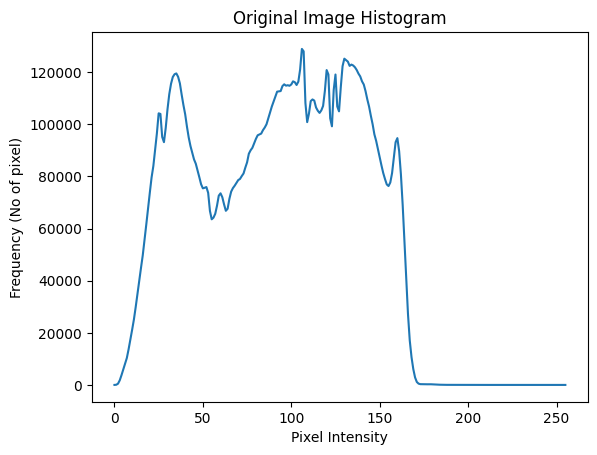

In [4]:
histogram = cv2.calcHist([image],[0], None, [256], [0,256]) #0 here indicates grayscale channel ,
# None - no mask , [256] number of bins(0-255 intensity values ) and [0,255] - intensity range

plt.plot(histogram)
plt.title("Original Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency (No of pixel)")
plt.show

**Histogram Equalization:** Redistributing pixel intensity values to make the histogram uniform

<function matplotlib.pyplot.show(close=None, block=None)>

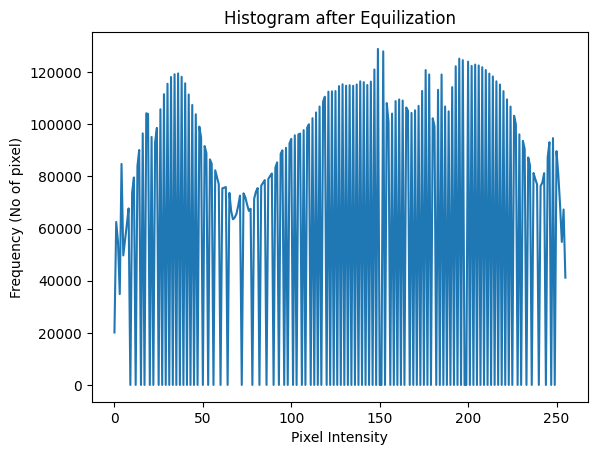

In [5]:
# Histogram Equalization using cv2.equalizeHist() function 

eq_image= cv2.equalizeHist(image)

#plotting histogram after Equalization
histogram2 = cv2.calcHist([eq_image],[0], None, [256], [0,256]) 

plt.plot(histogram2)
plt.title("Histogram after Equilization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency (No of pixel)")
plt.show

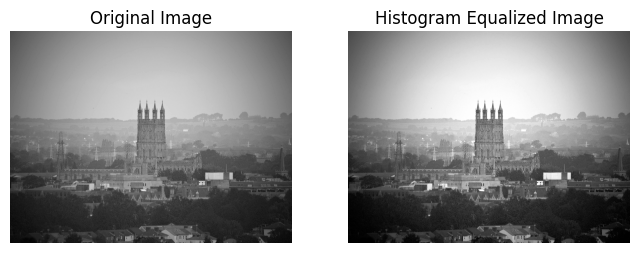

In [ ]:
#plotting original image vs Histogram Equalised Image 

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(eq_image, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.show()


**Adaptive Histogram Equalization (CLAHE): in this process , the image is divided into small tiles or blocks then after that each tile is histogram equilized one by one.**



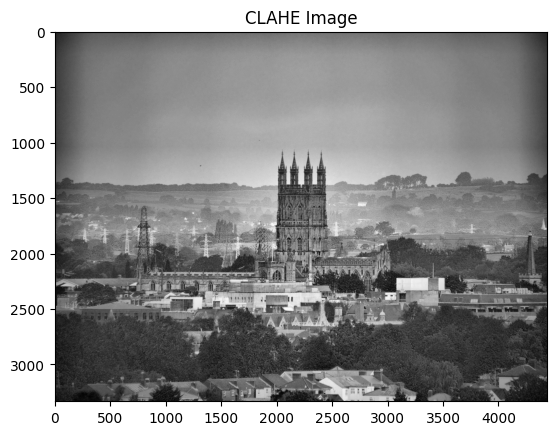

In [21]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

# clip limit is used to control how much the pixel intensity is increased in each small parts of the image.
# the clipLimit limits the high peaks in histogram so that contrast does not increase too much.
# Because of this, noise is also reduced and image does not look over enhanced.

clahe_image = clahe.apply(image)

plt.figure()
plt.imshow(clahe_image, cmap='gray')
plt.title("CLAHE Image")
plt.show()

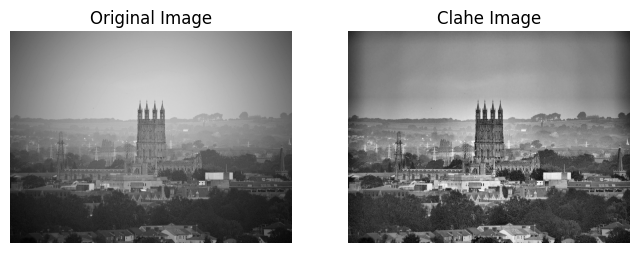

In [22]:
#plotting original image vs CLAHE image 

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(clahe_image, cmap='gray')
plt.title("Clahe Image")
plt.axis('off')

plt.show()

**Part B:** Frequency Domain Enhancement Techniques

(142, 192)


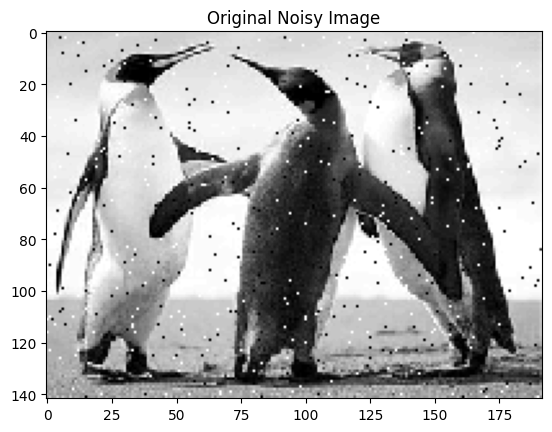

In [37]:
#displaying Original Noisy Image
image2 = cv2.imread("noicy_image.png", 0)

print(image2.shape) 

plt.figure()
plt.imshow(image2, cmap='gray')
plt.title("Original Noisy Image")
plt.show()


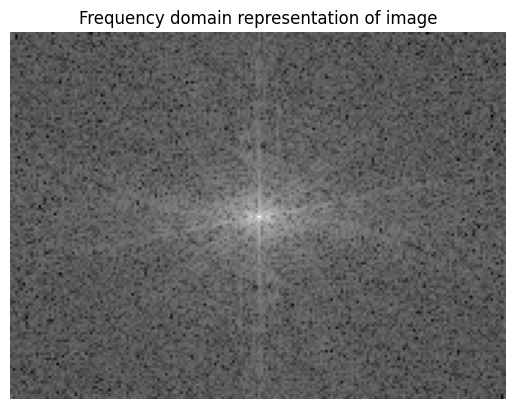

In [38]:
# Applying Fourier Transform (spartial domain to frequency domain)

import numpy as np

fouriertrans = np.fft.fft2(image2)


fouriertrans_shift = np.fft.fftshift(fouriertrans) # shifts 0 frequency to center

# visualising frequency spectrum
magnitude_spectrum = np.log(1 + np.abs(fouriertrans_shift))

plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency domain representation of image")
plt.axis('off')
plt.show()


**Low pass Filtering**

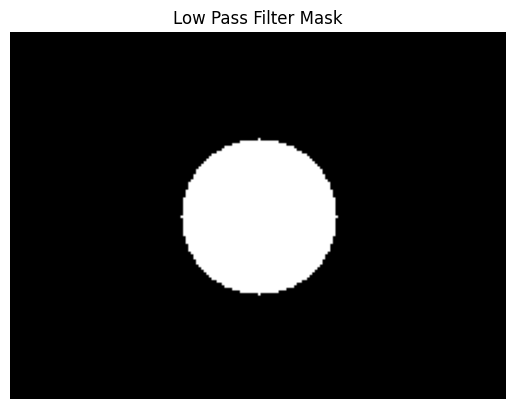

In [41]:
# creating Low pass filter mask
rows, cols = image2.shape # find the size of the image
crow, ccol = rows // 2, cols // 2

# create a blank mask with all zero values
mask = np.zeros((rows, cols), np.uint8)

# determined how much smooting is required
radius = 30

# drawing a circular region at the center to allow low frequencies
cv2.circle(mask, (ccol, crow), radius, 1, -1)

# displaying  the low pass filter mask
plt.figure()
plt.imshow(mask, cmap='gray')
plt.title("Low Pass Filter Mask")
plt.axis('off')
plt.show()


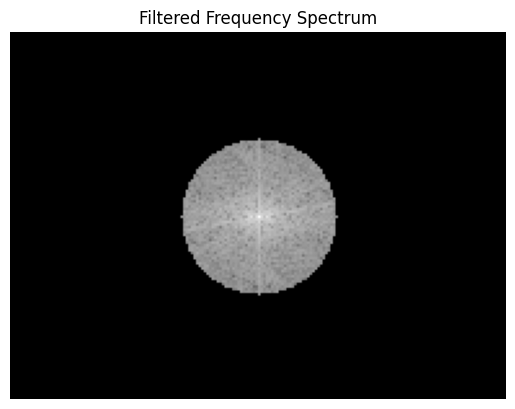

In [44]:
# applying mask
filtered_fourierTT = fouriertrans_shift * mask

# show filtered frequency spectrum
magnitude_filtered = np.log(1 + np.abs(filtered_fourierTT))

plt.figure()
plt.imshow(magnitude_filtered, cmap='gray')
plt.title("Filtered Frequency Spectrum")
plt.axis('off')
plt.show()


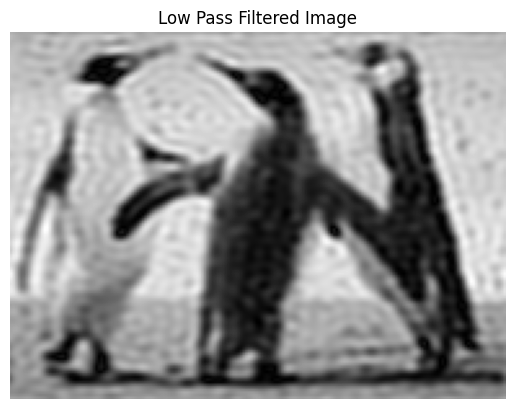

In [46]:
# converting frequency domain bacl to spartial domain 

# inverse shift
inversefft_shift = np.fft.ifftshift(filtered_fourierTT)

# inverse FFT
image3 = np.fft.ifft2(inversefft_shift)

image3 = np.abs(image3)

#the image is back to spartial dmain 

#displaying low pass filtered image

plt.figure()
plt.imshow(image3, cmap='gray')
plt.title("Low Pass Filtered Image")
plt.axis('off')
plt.show()


Original Image Vs Low pass filtered image

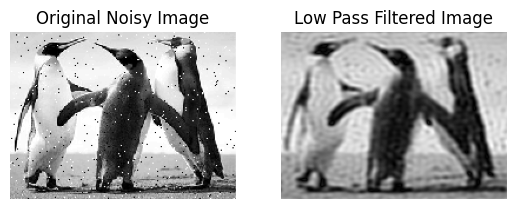

In [ ]:

plt.figure()

plt.subplot(1,2,1)
plt.imshow(image2, cmap='gray')
plt.title("Original Noisy Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image3, cmap='gray')
plt.title("Low Pass Filtered Image")
plt.axis('off')
plt.show()


**High Pass Filtering**

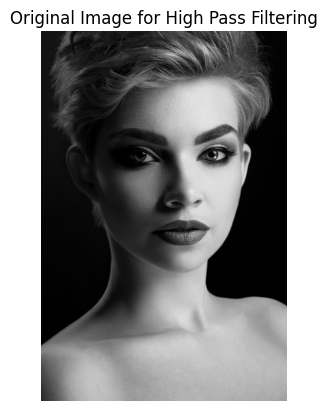

In [50]:
#displaying Original Image for High Pass Filtering 
image4 = cv2.imread("image4.jpg", 0)

plt.figure()
plt.imshow(image4, cmap='gray')
plt.title("Original Image for High Pass Filtering")
plt.axis('off')
plt.show()


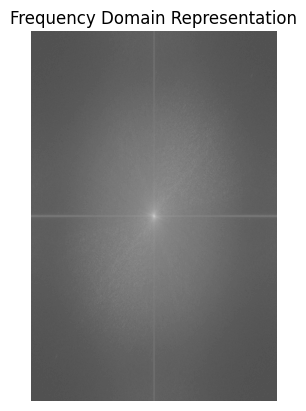

In [51]:
# Applying Fourier Transform (spartial domain to frequency domain)

fouriertransform = np.fft.fft2(image4)
fft_shift = np.fft.fftshift(fouriertransform)

magnitude_spectrum = np.log(1 + np.abs(fft_shift))

plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain Representation")
plt.axis('off')
plt.show()

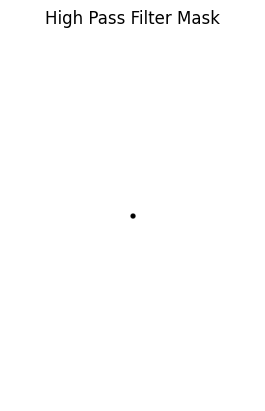

In [ ]:
# Creating high pass Filter mask

rows, cols = image4.shape
crow, ccol = rows // 2, cols // 2

# creating mask with all ones
mask = np.ones((rows, cols), np.uint8)

# cutoff radius
radius = 30

cv2.circle(mask, (ccol, crow), radius, 0, -1)

plt.figure()
plt.imshow(mask, cmap='gray')
plt.title("High Pass Filter Mask")
plt.axis('off')
plt.show()


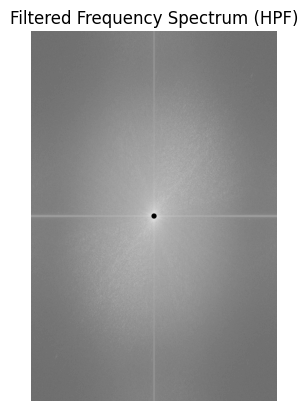

In [54]:
#applying mask
filtered_fouriertrasform =  fft_shift * mask

filtered_spectrum = np.log(1 + np.abs(filtered_fouriertrasform))

plt.figure()
plt.imshow(filtered_spectrum, cmap='gray')
plt.title("Filtered Frequency Spectrum (HPF)")
plt.axis('off')
plt.show()


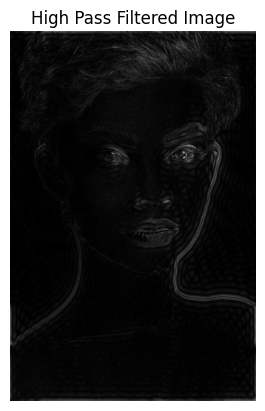

In [56]:
 #converting frequency domain bacl to spartial domain 

inverse_shift = np.fft.ifftshift(filtered_fouriertrasform)
image5 = np.fft.ifft2(inverse_shift)

image5 = np.abs(image5)

plt.figure()
plt.imshow(image5, cmap='gray')
plt.title("High Pass Filtered Image")
plt.axis('off')
plt.show()



Original image vs High Pass filtered Image

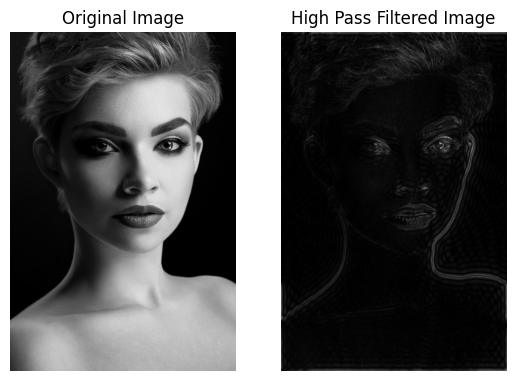

In [61]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(image4, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image5, cmap='gray')
plt.title("High Pass Filtered Image")
plt.axis('off')

plt.show()
